# Frequent Category Imputation

In [1]:
import pandas as pd

In [6]:
df = pd.read_csv('house.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [7]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [10]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

### compute the frequency with every Feature

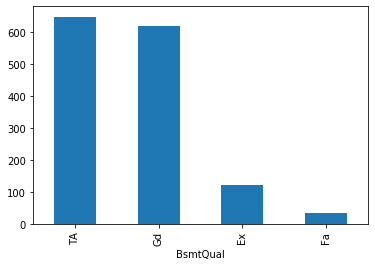

In [18]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

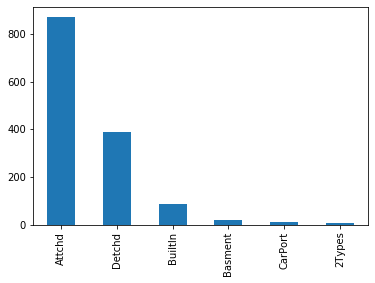

In [19]:
df['GarageType'].value_counts().plot.bar()

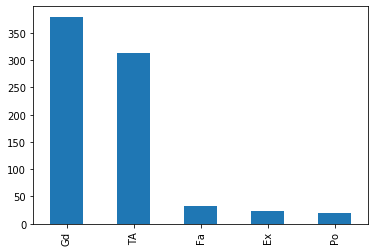

In [21]:
df['FireplaceQu'].value_counts().plot.bar()

In [22]:
## replacing function

In [23]:
df['GarageType'].value_counts().index[0]

'Attchd'

In [28]:
df['GarageType'].mode()

0    Attchd
dtype: object

In [24]:
def impute_nan(df,variable):
    most_frequent_category = df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [25]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [26]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [27]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

# Adding a variable to capture nan

In [29]:
df = pd.read_csv('house.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [30]:
import numpy as np

In [33]:
df['BsmtQual_var']=np.where(df['BsmtQual'].isnull(),1,0)

In [34]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,0,NaN,Attchd,208500,0
1,0,TA,Attchd,181500,0
2,0,TA,Attchd,223500,0
3,0,Gd,Detchd,140000,0
4,0,TA,Attchd,250000,0


In [36]:
frequent = df['BsmtQual'].mode()[0]

In [37]:
df['BsmtQual'].fillna(frequent,inplace=True)

In [42]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var
0,0,0,Attchd,208500,0,0
1,0,TA,Attchd,181500,0,0
2,0,TA,Attchd,223500,0,0
3,0,Gd,Detchd,140000,0,0
4,0,TA,Attchd,250000,0,0


In [47]:
df['FireplaceQu_var']=np.where(df['FireplaceQu'].isnull(),1,0)
frequent = df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent,inplace=True)

In [50]:
df.head(15)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var
0,0,0,Attchd,208500,0,0
1,0,TA,Attchd,181500,0,0
2,0,TA,Attchd,223500,0,0
3,0,Gd,Detchd,140000,0,0
4,0,TA,Attchd,250000,0,0
5,0,0,Attchd,143000,0,0
6,0,Gd,Attchd,307000,0,0
7,0,TA,Attchd,200000,0,0
8,0,TA,Detchd,129900,0,0
9,0,TA,Attchd,118000,0,0


# Suppose if you have more frequent categories , we just replace NAN with a new Category

In [51]:
df = pd.read_csv('house.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [52]:
def impute_nan(df,variable):
    df[variable + 'newvar'] = np.where(df[variable].isnull(),"Missing", df[variable])

In [55]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [57]:
df = df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)

In [58]:
df.head()

,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd


# Handle Categorical Features

# 1. One hot Encoding

In [60]:
df = pd.read_csv('train.csv',usecols=['Sex'])

In [61]:
df.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [64]:
pd.get_dummies(df,drop_first=True).head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [65]:
df = pd.read_csv('train.csv',usecols=['Embarked'])

In [66]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [68]:
df.dropna(inplace=True)

In [69]:
df.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [71]:
pd.get_dummies(df,drop_first=True).head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [85]:
df = pd.read_csv('Mercedez.csv',usecols=["X0","X1","X2","X3","X4","X5","X6"])

In [86]:
df.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [87]:
for i in df.columns:
    print(df[i].value_counts())

z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
ai     34
m      34
e      32
ba     27
at     25
a      21
ax     19
i      18
aq     18
am     18
u      17
aw     16
l      16
ad     14
k      11
au     11
b      11
as     10
r      10
bc      6
ao      4
c       3
q       2
aa      2
ac      1
g       1
ab      1
Name: X0, dtype: int64
aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
w      52
z      46
u      37
e      33
m      32
t      31
h      29
f      23
y      23
j      22
n      19
k      17
p       9
g       6
q       3
d       3
ab      3
Name: X1, dtype: int64
as    1659
ae     496
ai     415
m      367
ak     265
r      153
n      137
s       94
f       87
e       81
aq      63
ay      54
a       47
t       29
i       25
k       25
b       21
ao      20
z       19
ag   

In [88]:
for i in df.columns:
    print(len(df[i].unique()))

47
27
44
7
4
29
12


# handling many Categories

In [92]:
df.X1.value_counts().sort_values(ascending=False).head(10).index

Index(['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o'], dtype='object')

In [93]:
lst_10 = df.X1.value_counts().sort_values(ascending=False).head(10).index

In [94]:
lst_10

Index(['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o'], dtype='object')

In [95]:
lst_10 = list(lst_10)

In [96]:
lst_10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [98]:
import numpy as np
for categories in lst_10:
    df[categories]=np.where(df['X1']==categories,1,0)

In [101]:
df[lst_10]

,aa,s,b,l,v,r,i,a,c,o
0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4204,0,1,0,0,0,0,0,0,0,0
4205,0,0,0,0,0,0,0,0,0,1
4206,0,0,0,0,1,0,0,0,0,0
4207,0,0,0,0,0,1,0,0,0,0


# Ordinal Number Encoding

The way of representing the data in number wise format is known as ordinal number encoding. Assigning some values to the data with a new feature.

In [1]:
import datetime

In [2]:
today_date = datetime.datetime.today()

In [3]:
today_date

datetime.datetime(2020, 9, 1, 11, 33, 4, 818188)

In [4]:
today_date-datetime.timedelta(3)

datetime.datetime(2020, 8, 29, 11, 33, 4, 818188)

In [8]:
## List comprehension

days = [today_date-datetime.timedelta(x) for x in range(0,15)]

In [9]:
import pandas as pd
data=pd.DataFrame(days)
data.columns=["Day"]

In [10]:
data.head()

,Day
0,2020-09-01 11:33:04.818188
1,2020-08-31 11:33:04.818188
2,2020-08-30 11:33:04.818188
3,2020-08-29 11:33:04.818188
4,2020-08-28 11:33:04.818188


In [14]:
data['Day'].dt.day_name

<bound method PandasDelegate._add_delegate_accessors.<locals>._create_delegator_method.<locals>.f of <pandas.core.indexes.accessors.DatetimeProperties object at 0x7f2a880fa910>>

In [19]:
data['Weekday'] = data['Day'].dt.day_name()

In [20]:
data

,Day,Weekday
0,2020-09-01 11:33:04.818188,Tuesday
1,2020-08-31 11:33:04.818188,Monday
2,2020-08-30 11:33:04.818188,Sunday
3,2020-08-29 11:33:04.818188,Saturday
4,2020-08-28 11:33:04.818188,Friday
5,2020-08-27 11:33:04.818188,Thursday
6,2020-08-26 11:33:04.818188,Wednesday
7,2020-08-25 11:33:04.818188,Tuesday
8,2020-08-24 11:33:04.818188,Monday
9,2020-08-23 11:33:04.818188,Sunday


In [21]:
dict={'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7    
}

In [22]:
dict

{'Monday': 1,
 'Tuesday': 2,
 'Wednesday': 3,
 'Thursday': 4,
 'Friday': 5,
 'Saturday': 6,
 'Sunday': 7}

In [26]:
data['weekday_ordinal'] = data["Weekday"].map(dict)

In [27]:
data

,Day,Weekday,weekday_ordinal
0,2020-09-01 11:33:04.818188,Tuesday,2
1,2020-08-31 11:33:04.818188,Monday,1
2,2020-08-30 11:33:04.818188,Sunday,7
3,2020-08-29 11:33:04.818188,Saturday,6
4,2020-08-28 11:33:04.818188,Friday,5
5,2020-08-27 11:33:04.818188,Thursday,4
6,2020-08-26 11:33:04.818188,Wednesday,3
7,2020-08-25 11:33:04.818188,Tuesday,2
8,2020-08-24 11:33:04.818188,Monday,1
9,2020-08-23 11:33:04.818188,Sunday,7


# Count Or Frequency Encoding

In [95]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',header=None, index_col=None)
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [96]:
columns=[1,3,5,6,7,8,9,13]

In [97]:
train_set=train_set[columns]

In [98]:
train_set

,1,3,5,6,7,8,9,13
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States


In [99]:
train_set.columns=['Employment','Degree','Status','Designation','Family_job','Race','Sex','Country']

In [100]:
train_set

,Employment,Degree,Status,Designation,Family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States


In [101]:
for feature in train_set.columns[:]:
    print(feature,":",len(train_set[feature].unique()),'Labels')

Employment : 9 Labels
Degree : 16 Labels
Status : 7 Labels
Designation : 15 Labels
Family_job : 6 Labels
Race : 5 Labels
Sex : 2 Labels
Country : 42 Labels


In [102]:
country_map=train_set['Country'].value_counts().to_dict()

In [103]:
train_set['Country'] = train_set['Country'].map(country_map)
train_set.head(20)

,Employment,Degree,Status,Designation,Family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,29170
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,29170
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,29170
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,95
5,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,29170
6,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,81
7,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
8,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,29170
9,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170


### Advantages

1. It is Easy to use.
2. Not Increasing any feature space.

### DisAdvantages

1. It will provide same weight if the frequency are same. 
for example if the states has two same value it will not be able to provide the same weight


# Target Guided Ordinal Encoding

1. Ordering the labels according the target .
2. we may replace the labels by joint probability of being 1 or 0.

In [106]:
import pandas as pd
df=pd.read_csv('train.csv',usecols=['Cabin','Survived'])

In [107]:
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [109]:
df['Cabin'].fillna('Missing',inplace=True)

In [112]:
df.head(30)

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing
5,0,Missing
6,0,E46
7,0,Missing
8,1,Missing
9,1,Missing


In [114]:
# so here there are many missing values and you can see some cabin values which are just seat number so we will be accessing the first letter of every seat number
df['Cabin']=df['Cabin'].astype(str).str[0]

In [116]:
df.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [121]:
ordinal_labels=df.groupby(['Cabin'])['Survived'].mean().sort_values().index
ordinal_labels

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [122]:
ordinal_labels2={k:i for i,k in enumerate(ordinal_labels,0)}

In [123]:
ordinal_labels2

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [124]:
df['Cabin_ordinal_labels'] = df['Cabin'].map(ordinal_labels2)

In [125]:
df.head()

,Survived,Cabin,Cabin_ordinal_labels
0,0,M,1
1,1,C,4
2,1,M,1
3,1,C,4
4,0,M,1


# Mean Encoding 

In [130]:
mean_ordinal=df.groupby(['Cabin'])['Survived'].mean().to_dict()
mean_ordinal

{'A': 0.4666666666666667,
 'B': 0.7446808510638298,
 'C': 0.5932203389830508,
 'D': 0.7575757575757576,
 'E': 0.75,
 'F': 0.6153846153846154,
 'G': 0.5,
 'M': 0.29985443959243085,
 'T': 0.0}

In [131]:
df['mean_ordinal_encode'] = df['Cabin'].map(mean_ordinal)
df.head()

,Survived,Cabin,Cabin_ordinal_labels,mean_ordinal_encode
0,0,M,1,0.299854
1,1,C,4,0.593220
2,1,M,1,0.299854
3,1,C,4,0.593220
4,0,M,1,0.299854


# Probability Ratio Encoding
STEPS
1. Probability of survived based on cabin-- Categorical Feature
2. Probability of Not Survived:- 1-PR(survived)
3. Pr(Survived)/pr(Not Survived)
4. Dictionary to map cabin with probability
5. replace with the categorical feature.      

In [132]:
import pandas as pd

In [133]:
df = pd.read_csv('train.csv' ,usecols=['Cabin','Survived'])

In [136]:
### Replacing
df['Cabin'].fillna('Missing',inplace=True)

In [137]:
df.head(20)

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing
5,0,Missing
6,0,E46
7,0,Missing
8,1,Missing
9,1,Missing


In [138]:
df['Cabin'].unique()

array(['Missing', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [139]:
df["cabin"] = df["Cabin"].astype(str).str[0]

In [140]:
df.head()

,Survived,Cabin,cabin
0,0,Missing,M
1,1,C85,C
2,1,Missing,M
3,1,C123,C
4,0,Missing,M


In [141]:
df.cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [144]:
prob_df=df.groupby(['Cabin'])['Survived'].mean()

In [145]:
prob_df = pd.DataFrame(prob_df)

In [147]:
prob_df.head()

,Survived
Cabin,
A10,0.0
A14,0.0
A16,1.0
A19,0.0
A20,1.0


In [148]:
prob_df['Died']=1-prob_df['Survived']

In [149]:
prob_df.head()

,Survived,Died
Cabin,,
A10,0.0,1.0
A14,0.0,1.0
A16,1.0,0.0
A19,0.0,1.0
A20,1.0,0.0


In [150]:
prob_df['Probability_Ratio']=prob_df['Survived']/prob_df['Died']

In [152]:
prob_df.head()

,Survived,Died,Probability_Ratio
Cabin,,,
A10,0.0,1.0,0.0
A14,0.0,1.0,0.0
A16,1.0,0.0,inf
A19,0.0,1.0,0.0
A20,1.0,0.0,inf


In [154]:
probability_encoded = prob_df['Probability_Ratio'].to_dict()

In [156]:
probability_encoded

{'A10': 0.0,
 'A14': 0.0,
 'A16': inf,
 'A19': 0.0,
 'A20': inf,
 'A23': inf,
 'A24': 0.0,
 'A26': inf,
 'A31': inf,
 'A32': 0.0,
 'A34': inf,
 'A36': 0.0,
 'A5': 0.0,
 'A6': inf,
 'A7': 0.0,
 'B101': inf,
 'B102': 0.0,
 'B18': inf,
 'B19': 0.0,
 'B20': inf,
 'B22': 1.0,
 'B28': inf,
 'B3': inf,
 'B30': 0.0,
 'B35': inf,
 'B37': 0.0,
 'B38': 0.0,
 'B39': inf,
 'B4': inf,
 'B41': inf,
 'B42': inf,
 'B49': inf,
 'B5': inf,
 'B50': inf,
 'B51 B53 B55': 1.0,
 'B57 B59 B63 B66': inf,
 'B58 B60': 1.0,
 'B69': inf,
 'B71': 0.0,
 'B73': inf,
 'B77': inf,
 'B78': inf,
 'B79': inf,
 'B80': inf,
 'B82 B84': 0.0,
 'B86': 0.0,
 'B94': 0.0,
 'B96 B98': inf,
 'C101': inf,
 'C103': inf,
 'C104': inf,
 'C106': inf,
 'C110': 0.0,
 'C111': 0.0,
 'C118': 0.0,
 'C123': 1.0,
 'C124': 0.0,
 'C125': inf,
 'C126': inf,
 'C128': 0.0,
 'C148': inf,
 'C2': 1.0,
 'C22 C26': 0.49999999999999994,
 'C23 C25 C27': 1.0,
 'C30': 0.0,
 'C32': inf,
 'C45': inf,
 'C46': 0.0,
 'C47': inf,
 'C49': 0.0,
 'C50': inf,
 'C52': i

In [157]:
df['cabin_encoded']=df['Cabin'].map(probability_encoded)
df.head()

,Survived,Cabin,cabin,cabin_encoded
0,0,Missing,M,0.428274
1,1,C85,C,inf
2,1,Missing,M,0.428274
3,1,C123,C,1.000000
4,0,Missing,M,0.428274
